In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.cluster import KMeans 
import sklearn.cluster as cluster

In [2]:
l1= pd.Series({'Attribute1':2,'Attribute2':10})
l2= pd.Series({'Attribute1':2,'Attribute2':5})
l3= pd.Series({'Attribute1':8,'Attribute2':4})
l4= pd.Series({'Attribute1':5,'Attribute2':8})
l5= pd.Series({'Attribute1':7,'Attribute2':5})
l6= pd.Series({'Attribute1':6,'Attribute2':4})
l7= pd.Series({'Attribute1':1,'Attribute2':2})
l8= pd.Series({'Attribute1':4,'Attribute2':9})
df = pd.DataFrame([l1,l2,l3,l4,l5,l6,l7,l8])
df


,Attribute1,Attribute2
0,2,10
1,2,5
2,8,4
3,5,8
4,7,5
5,6,4
6,1,2
7,4,9


## Scaling

In [3]:
scaler = MinMaxScaler()
scale=scaler.fit_transform(df[['Attribute1','Attribute2']])
df_scale=pd.DataFrame(scale,columns=['Attribute1','Attribute2']);
df_scale

,Attribute1,Attribute2
0,0.142857,1.000
1,0.142857,0.375
2,1.000000,0.250
3,0.571429,0.750
4,0.857143,0.375
5,0.714286,0.250
6,0.000000,0.000
7,0.428571,0.875


In [4]:
km=KMeans(n_clusters=3)

In [5]:
y_km = km.fit_predict(df[['Attribute1','Attribute2']])
y_km

array([2, 1, 0, 2, 0, 0, 1, 2])

In [6]:
km.cluster_centers_

array([[7.        , 4.33333333],
       [1.5       , 3.5       ],
       [3.66666667, 9.        ]])

In [30]:
km.cluster_centers_.reshape(2,3)

array([[7.        , 4.33333333, 1.5       ],
       [3.5       , 3.66666667, 9.        ]])

In [7]:
kmeans=cluster.KMeans(n_clusters=3,init="k-means++")
kmeans = kmeans.fit(df[['Attribute1','Attribute2']])


<AxesSubplot:xlabel='Attribute1', ylabel='Attribute2'>

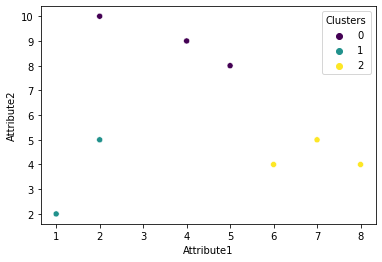

In [8]:
df["Clusters"] = kmeans.labels_
sns.scatterplot(x="Attribute1",y="Attribute2",hue="Clusters",data=df,palette='viridis')

In [9]:
K = range(2,8)
wss=[]

In [10]:
 for k in K:
    kmeans=cluster.KMeans(n_clusters=k)

In [11]:
kmeans=kmeans.fit(df_scale)

In [12]:
wss_iter=kmeans.inertia_
wss.append(wss_iter)

In [14]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,8):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(df_scale).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
    +str(metrics.silhouette_score(df_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.3960790641612191
Silhouette score for k(clusters) = 3 is 0.5648525330501148
Silhouette score for k(clusters) = 4 is 0.47751663091430685
Silhouette score for k(clusters) = 5 is 0.3687975125416946
Silhouette score for k(clusters) = 6 is 0.16804352358468255
Silhouette score for k(clusters) = 7 is 0.04195198583801057


### So the best K value is 3 as it has highest score.